**Project 3**

Kuei-Tzu Hu 206300553

Sreya Muppalla 505675909

Christina Lee 406299676

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/ECE ENGR 219/

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1FqG9_tNYj-2BTn9RFaOQCLxMO_q609zf/ECE ENGR 219


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### QUESTION 1: Explore the Dataset:

In this question, we explore the structure of the data.

**A Compute the sparsity of the movie rating dataset:**


In [ ]:
ratings = pd.read_csv("Synthetic_Movie_Lens/ratings.csv")

userId = ratings['userId'].values
movieId = ratings['movieId'].values
rating = ratings['rating'].values

In [ ]:
sparsity = len(rating)/(len(set(movieId))*len(set(userId)))
print("Sparsity =", sparsity)

Sparsity = 0.016999683055613623


**B Plot a histogram showing the frequency of the rating values:** Bin the raw rating values
into intervals of width 0.5 and use the binned rating values as the horizontal axis. Count the
number of entries in the ratings matrix R that fall within each bin and use this count as the
height of the vertical axis for that particular bin. Comment on the shape of the histogram.


- The histogram is slightly skewed to the right, with 4.0 being the most common rating. Ratings ending in .0 are generally more popular than ratings ending in .5.

Text(0.5, 1.0, 'Frequency of Rating Values')

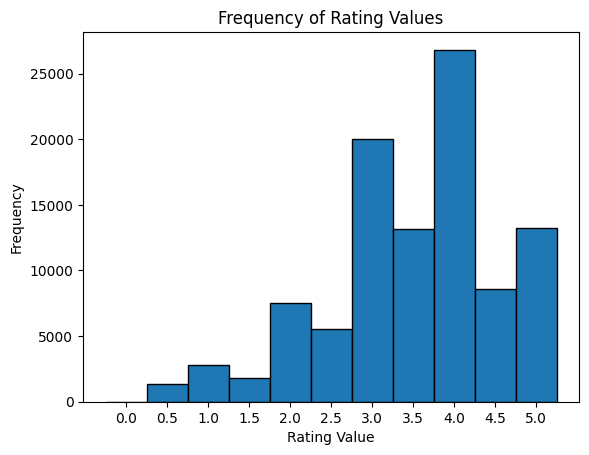

In [ ]:
bins = np.arange(0, 6, 0.5) - 0.25
plt.hist(rating, bins=bins, edgecolor = "black")
plt.xticks(np.arange(0, 5.5, 0.5))
plt.xlabel("Rating Value")
plt.ylabel("Frequency")
plt.title("Frequency of Rating Values")


**C Plot the distribution of the number of ratings received among movies:** The X-axis
should be the movie index ordered by decreasing frequency and the Y -axis should be the number
of ratings the movie has received; ties can broken in any way. A monotonically decreasing trend
is expected.


Text(0.5, 1.0, 'Dist. of Ratings Received Among Movies')

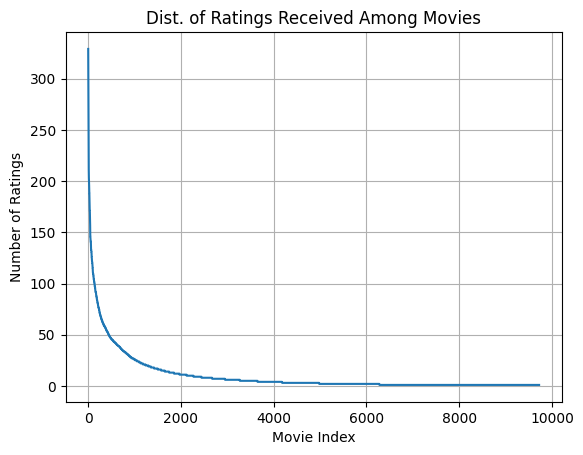

In [ ]:
index, count =  np.unique(movieId, return_counts=True)
plt.plot(range(1,len(index)+1), sorted(count, reverse=True))
plt.grid()
plt.xlabel("Movie Index")
plt.ylabel("Number of Ratings")
plt.title("Dist. of Ratings Received Among Movies")

**D Plot the distribution of ratings among users:** The X-axis should be the user index ordered
by decreasing frequency and the Y -axis should be the number of movies the user has rated.
The requirement of the plot is similar to that in Question C.


Text(0.5, 1.0, 'Dist. of Ratings Received Among Users')

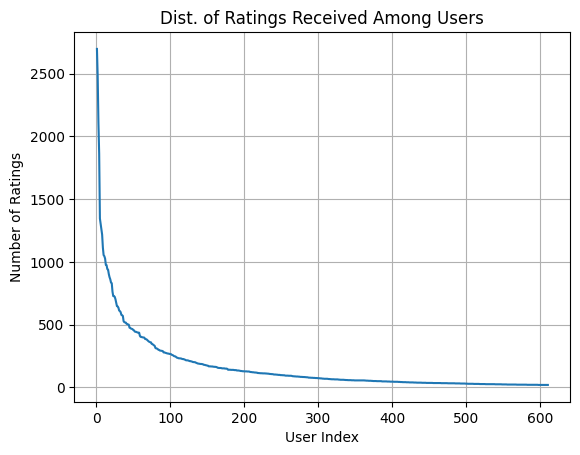

In [ ]:
index, count =  np.unique(userId, return_counts=True)
plt.plot(range(1,len(index)+1), sorted(count, reverse=True))
plt.grid()
plt.xlabel("User Index")
plt.ylabel("Number of Ratings")
plt.title("Dist. of Ratings Received Among Users")

**E** Discuss the salient features of the distributions from Questions C,D and their implications
for the recommendation process.

Number of ratings has an inverse relationship with movie indices because the graph shows that a lot smaller amount of movies received most of the ratings whereas the rest(hence majority) of the movies received a smaller number of ratings. So the rating matrix R is sparse so heavy regularization needs to be used to precent overfitting and false links. 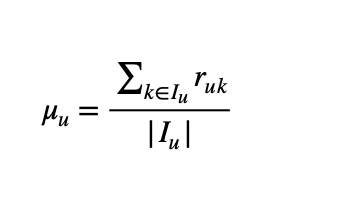

**F Compute the variance of the rating values received by each movie:** Bin the variance
values into intervals of width 0.5 and use the binned variance values as the horizontal axis.
Count the number of movies with variance values in the binned intervals and use this count as
the vertical axis. Briefly comment on the shape of the resulting histogram.

- The shape of the histogram is skewed to the left. Most of the variances are 0 and the freqeuncy decreases as rating value increases.

Text(0.5, 1.0, 'Variance of Rating Values')

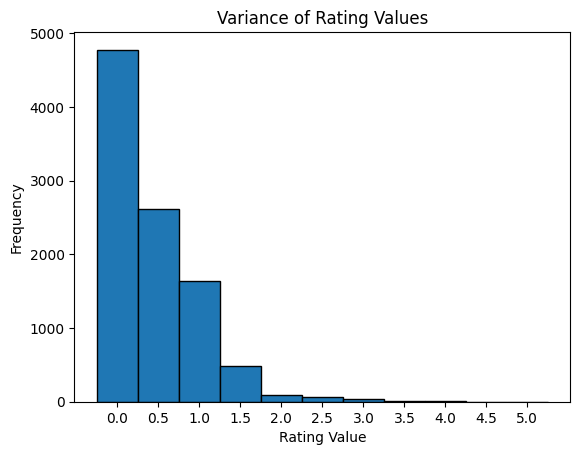

In [ ]:
movie_rating = {}
for i in range(len(rating)):
    if movieId[i] not in movie_rating:
        movie_rating[movieId[i]] = [rating[i]]
    else:
        movie_rating[movieId[i]].append(rating[i])

variance = [np.var(movie_rating[m]) for m in movie_rating]

bins = np.arange(0, 6, 0.5) - 0.25
plt.hist(variance, bins=bins, edgecolor = "black")
plt.xticks(np.arange(0, 5.5, 0.5))
plt.xlabel("Rating Value")
plt.ylabel("Frequency")
plt.title("Variance of Rating Values")

### QUESTION 2: Understanding the Pearson Correlation Coefficient:

**A Write down the formula for µu in terms of Iu and ruk;**


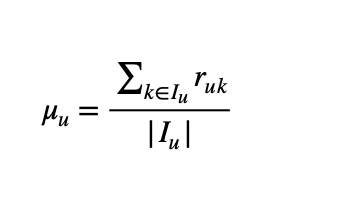


**B In plain words, explain the meaning of Iu ∩ Iv. Can Iu ∩ Iv = ∅? (Hint: Rating matrix R is sparse)**

The intersection represents movies rated by users u and v. Because rating matrix R is sparse, the intersection would be equal to an empty set since it makes sense that both types of users didn't watch and rate the same movie.

### QUESTION 3: Understanding the Prediction function:

**Can you explain the reason behind mean-centering the raw ratings (rvj − µv) in the prediction function? (Hint: Consider users who either rate all items highly or rate all items poorly and the impact of these users on the prediction function.)**

The reason is because it helps get rid of extreme data points and reduces bias which can lead to more accurate predictions.

### QUESTION 4: Design a k-NN collaborative filter to predict the ratings of the movies in the original dataset and evaluate its performance using 10-fold cross validation.

Sweep k (number of
neighbors) from 2 to 100 in step sizes of 2, and for each k compute the average RMSE and average
MAE obtained by averaging the RMSE and MAE across all 10 folds. Plot average RMSE (Y-axis)
against k (X-axis) and average MAE (Y-axis) against k (X-axis).

In [ ]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163006 sha256=87286772f751b37d142430223dfb7ddd0c7c3219d99688c1d8942aa716066873
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms.knns import KNNWithMeans

reader = Reader(line_format='user item rating timestamp', sep=',',skip_lines=1, rating_scale=(0.5, 5))
data = Dataset.load_from_file('Synthetic_Movie_Lens/ratings.csv', reader=reader)

Test k = 2
Test k = 4
Test k = 6
Test k = 8
Test k = 10
Test k = 12
Test k = 14
Test k = 16
Test k = 18
Test k = 20
Test k = 22
Test k = 24
Test k = 26
Test k = 28
Test k = 30
Test k = 32
Test k = 34
Test k = 36
Test k = 38
Test k = 40
Test k = 42
Test k = 44
Test k = 46
Test k = 48
Test k = 50
Test k = 52
Test k = 54
Test k = 56
Test k = 58
Test k = 60
Test k = 62
Test k = 64
Test k = 66
Test k = 68
Test k = 70
Test k = 72
Test k = 74
Test k = 76
Test k = 78
Test k = 80
Test k = 82
Test k = 84
Test k = 86
Test k = 88
Test k = 90
Test k = 92
Test k = 94
Test k = 96
Test k = 98
Test k = 100


Text(0.5, 1.0, 'k-NN collaborative filter with 10-fold CV')

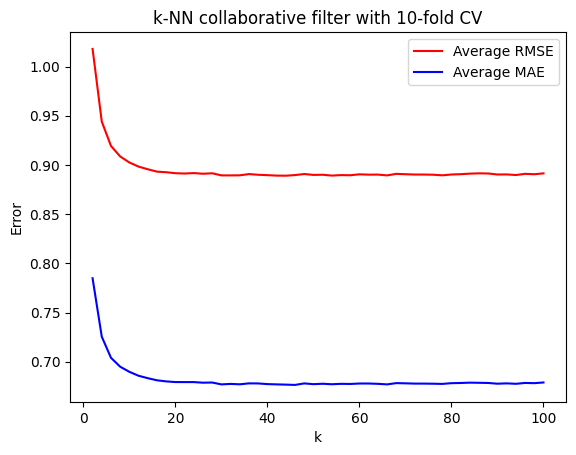

In [ ]:
k = np.arange(2,102,2)
rmse = []
mae = []
for i in k:
    print('Test k =',i)
    knn = KNNWithMeans(k=i, sim_options={'name':'pearson'}, verbose=False);
    cv = cross_validate(knn, data,cv=10,n_jobs=1)

    rmse.append(np.mean(cv['test_rmse']))
    mae.append(np.mean(cv['test_mae']))

fig, ax = plt.subplots()
ax.plot(k, rmse, 'r', label='Average RMSE')
ax.plot(k, mae, 'b', label='Average MAE')
ax.legend(loc='best')
plt.xlabel("k")
plt.ylabel("Error")
plt.title("k-NN collaborative filter with 10-fold CV")

QUESTION 5:

Use the plot from question 4, to find a ’minimum k’.

Note: The term ’minimum
k’ in this context means that increasing k above the minimum value would not result in a significant decrease in average RMSE or average MAE. If you get the plot correct, then ’minimum k’ would correspond to the k value for which average RMSE and average MAE converges to a steady-state value. Please report the steady state values of average RMSE and average MAE.

- From the plot above, we can see that minimum k is 20.

In [ ]:
print('Steady state value of average RMSE:', rmse[9])
print('Steady state value of average MAE:',mae[9])

Steady state value of average RMSE: 0.89161141380354
Steady state value of average MAE: 0.6793447484329692


QUESTION 6:


Within EACH of the 3 trimmed subsets in the dataset, design (train andvalidate):
A k-NN collaborative filter on the ratings of the movies (i.e Popular, Unpopular or High-Variance) and evaluate each of the three models’ performance using 10-fold cross validation:

• Sweep k (number of neighbors) from 2 to 100 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis). Also, report the minimum average RMSE.

• Plot the ROC curves for the k-NN collaborative filters for threshold values [2.5, 3, 3.5, 4]. These thresholds are applied only on the ground truth labels in held-out validation set. For each of the plots, also report the area under the curve (AUC) value. You should have 4 × 4 plots in this section (4 trimming options – including no trimming times 4 thresholds) - all thresholds can be condensed into one plot per trimming option yielding only 4 plots.

k =  2
k =  4
k =  6
k =  8
k =  10
k =  12
k =  14
k =  16
k =  18
k =  20
k =  22
k =  24
k =  26
k =  28
k =  30
k =  32
k =  34
k =  36
k =  38
k =  40
k =  42
k =  44
k =  46
k =  48
k =  50
k =  52
k =  54
k =  56
k =  58
k =  60
k =  62
k =  64
k =  66
k =  68
k =  70
k =  72
k =  74
k =  76
k =  78
k =  80
k =  82
k =  84
k =  86
k =  88
k =  90
k =  92
k =  94
k =  96
k =  98
k =  100
Minimum Average RMSE for Popular Movie Trimming:  0.8689899677791469


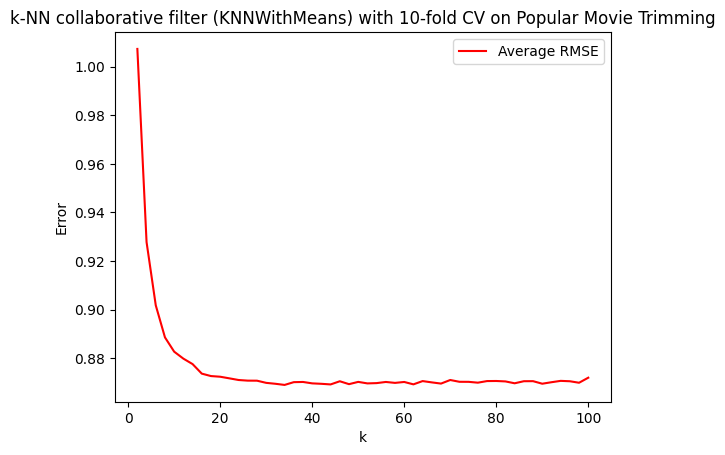

In [ ]:
# Popular Movie Trimming
from surprise.model_selection import KFold
from surprise import accuracy

kf = KFold(n_splits=10)
k = np.linspace(2,100,dtype=int)
avg_rmse = []
ref = {}
for j in data.raw_ratings:
    if j[1] in ref.keys():
        ref[j[1]].append(j[2])
    else:
        ref[j[1]] = []
        ref[j[1]].append(j[2])

pop_trim = [j for j in data.raw_ratings if len(ref[j[1]]) > 2]
df = pd.DataFrame(pop_trim)
df = df.drop(df.columns[3], axis=1)
data_trim = Dataset.load_from_df(df, reader)

for i in k:
    print('k = ', i)
    rmse = 0
    for trainset, testset in kf.split(data_trim):
        pred = KNNWithMeans(k=i,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(testset)
        rmse += accuracy.rmse(pred,verbose=False)
    avg_rmse.append(rmse/10.0)

print("Minimum Average RMSE for Popular Movie Trimming: ", min(avg_rmse))
fig, ax = plt.subplots()
ax.plot(k,avg_rmse, 'r', label='Average RMSE')
ax.legend(loc='best')
plt.xlabel("k"); plt.ylabel("Error"); plt.title("k-NN collaborative filter (KNNWithMeans) with 10-fold CV on Popular Movie Trimming")
plt.show()

k =  2
k =  4
k =  6
k =  8
k =  10
k =  12
k =  14
k =  16
k =  18
k =  20
k =  22
k =  24
k =  26
k =  28
k =  30
k =  32
k =  34
k =  36
k =  38
k =  40
k =  42
k =  44
k =  46
k =  48
k =  50
k =  52
k =  54
k =  56
k =  58
k =  60
k =  62
k =  64
k =  66
k =  68
k =  70
k =  72
k =  74
k =  76
k =  78
k =  80
k =  82
k =  84
k =  86
k =  88
k =  90
k =  92
k =  94
k =  96
k =  98
k =  100
Minimum Average RMSE for Unpopular Movie Trimming:  1.051062534411778


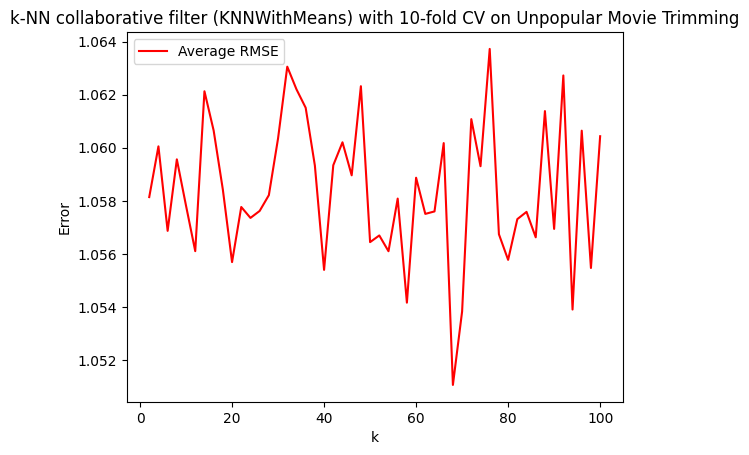

In [ ]:
# Unpopular Movie Trimming
kf = KFold(n_splits=10)
k = np.linspace(2,100,dtype=int)
avg_rmse = []
ref = {}
for j in data.raw_ratings:
    if j[1] in ref.keys():
        ref[j[1]].append(j[2])
    else:
        ref[j[1]] = []
        ref[j[1]].append(j[2])

unpop_trim = [j for j in data.raw_ratings if len(ref[j[1]]) <= 2]
df = pd.DataFrame(unpop_trim)
df = df.drop(df.columns[3], axis=1)
data_trim = Dataset.load_from_df(df, reader)

for i in k:
    print('k = ', i)
    rmse = 0
    for trainset, testset in kf.split(data_trim):
        pred = KNNWithMeans(k=i,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(testset)
        rmse += accuracy.rmse(pred,verbose=False)
    avg_rmse.append(rmse/10.0)

print("Minimum Average RMSE for Unpopular Movie Trimming: ", min(avg_rmse))
fig, ax = plt.subplots()
ax.plot(k,avg_rmse, 'r', label='Average RMSE')
ax.legend(loc='best')
plt.xlabel("k"); plt.ylabel("Error"); plt.title("k-NN collaborative filter (KNNWithMeans) with 10-fold CV on Unpopular Movie Trimming")
plt.show()

k =  2
k =  4
k =  6
k =  8
k =  10
k =  12
k =  14
k =  16
k =  18
k =  20
k =  22
k =  24
k =  26
k =  28
k =  30
k =  32
k =  34
k =  36
k =  38
k =  40
k =  42
k =  44
k =  46
k =  48
k =  50
k =  52
k =  54
k =  56
k =  58
k =  60
k =  62
k =  64
k =  66
k =  68
k =  70
k =  72
k =  74
k =  76
k =  78
k =  80
k =  82
k =  84
k =  86
k =  88
k =  90
k =  92
k =  94
k =  96
k =  98
k =  100
Minimum Average RMSE for High Variance Movie Trimming:  1.4507260778831574


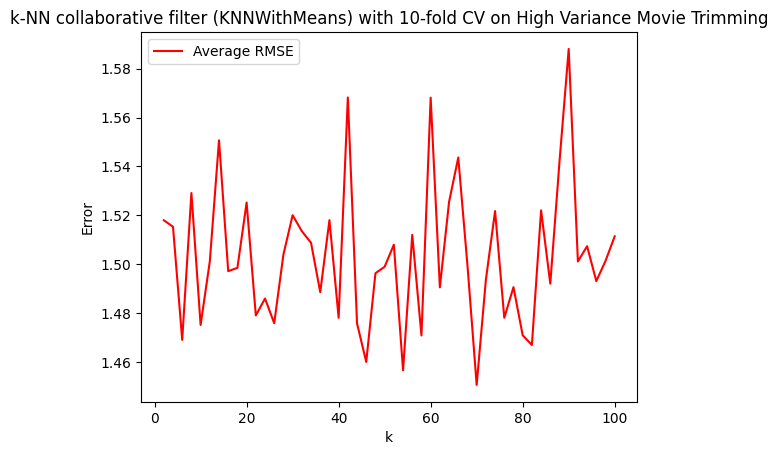

In [ ]:
# High Variance Movie Trimming
kf = KFold(n_splits=10)
k = np.linspace(2,100,dtype=int)
avg_rmse = []
ref = {}
for j in data.raw_ratings:
    if j[1] in ref.keys():
        ref[j[1]].append(j[2])
    else:
        ref[j[1]] = []
        ref[j[1]].append(j[2])

highvar_trim = [j for j in data.raw_ratings if (len(ref[j[1]]) >= 5 and np.var(ref[j[1]]) >= 2)]
df = pd.DataFrame(highvar_trim)
df = df.drop(df.columns[3], axis=1)
data_trim = Dataset.load_from_df(df, reader)

for i in k:
    print('k = ', i)
    rmse = 0
    for trainset, testset in kf.split(data_trim):
        pred = KNNWithMeans(k=i,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(testset)
        rmse += accuracy.rmse(pred,verbose=False)
    avg_rmse.append(rmse/10.0)

print("Minimum Average RMSE for High Variance Movie Trimming: ", min(avg_rmse))
fig, ax = plt.subplots()
ax.plot(k,avg_rmse, 'r', label='Average RMSE')
ax.legend(loc='best')
plt.xlabel("k"); plt.ylabel("Error"); plt.title("k-NN collaborative filter (KNNWithMeans) with 10-fold CV on High Variance Movie Trimming")
plt.show()

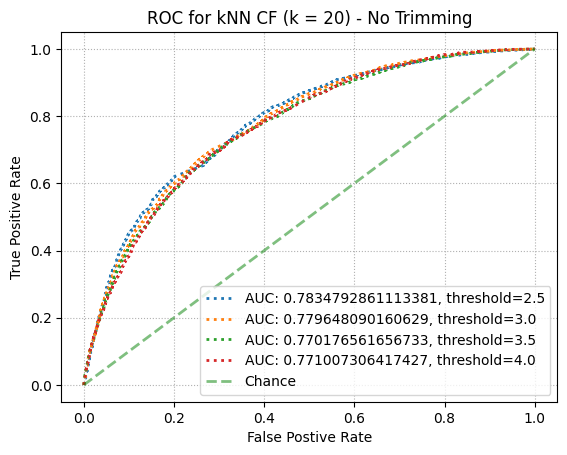

In [ ]:
from surprise.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
k = 20
thres = [2.5, 3.0, 3.5, 4.0]
trainset, testset = train_test_split(data, test_size=0.1)
res  = KNNWithMeans(k=k,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(testset)

fig, ax = plt.subplots()
for item in thres:
    thresholded_out = []
    for row in res:
        if row.r_ui > item:
            thresholded_out.append(1)
        else:
            thresholded_out.append(0)
    fpr, tpr, thresholds = roc_curve(thresholded_out, [row.est for row in res])
    ax.plot(fpr, tpr,lw=2,linestyle=':',label="AUC: "+str(auc(fpr,tpr))+', threshold='+str(item))
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='g', label='Chance', alpha=.5)
plt.legend(loc='best')
plt.grid(linestyle=':')
plt.title('ROC for kNN CF (k = 20) - No Trimming')
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')
plt.show()

(94794, 3)


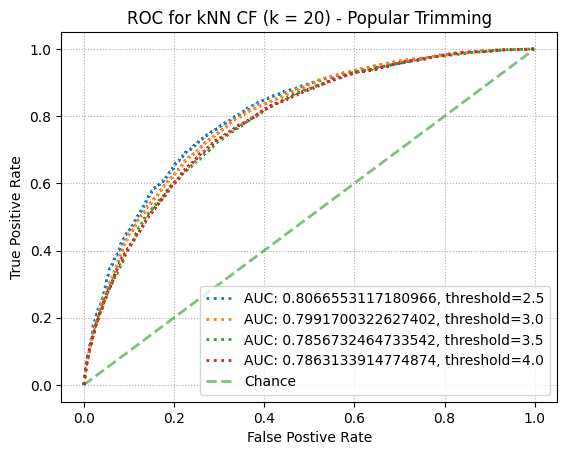

In [ ]:
k = 20
thres = [2.5, 3.0, 3.5, 4.0]
ref = {}
for j in data.raw_ratings:
    if j[1] in ref.keys():
        ref[j[1]].append(j[2])
    else:
        ref[j[1]] = []
        ref[j[1]].append(j[2])

pop_trim = [j for j in data.raw_ratings if len(ref[j[1]]) > 2]
df = pd.DataFrame(pop_trim)
df = df.drop(df.columns[3], axis=1)
print(df.shape)
data_trim = Dataset.load_from_df(df, reader)

trainset, testset = train_test_split(data_trim, test_size=0.1)

res = KNNWithMeans(k=k,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(testset)

fig, ax = plt.subplots()
for item in thres:
    thresholded_out = []
    for row in res:
        if row.r_ui > item:
            thresholded_out.append(1)
        else:
            thresholded_out.append(0)
    fpr, tpr, thresholds = roc_curve(thresholded_out, [row.est for row in res])
    ax.plot(fpr, tpr,lw=2,linestyle=':',label="AUC: "+str(auc(fpr,tpr))+', threshold='+str(item))
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='g', label='Chance', alpha=.5)
plt.legend(loc='best')
plt.grid(linestyle=':')
plt.title('ROC for kNN CF (k = 20) - Popular Trimming')
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')
plt.show()

(6042, 4)


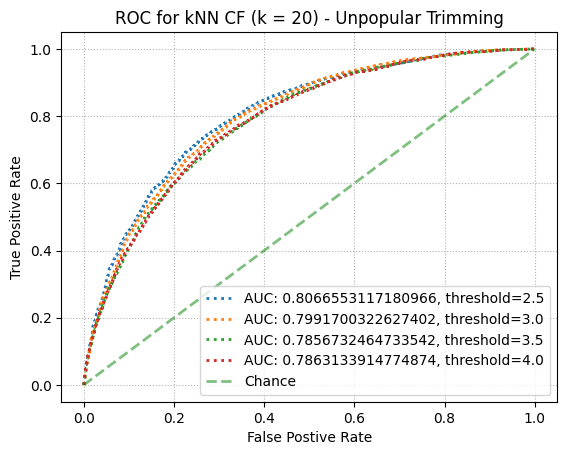

In [ ]:
k = 20
thres = [2.5, 3.0, 3.5, 4.0]
ref = {}
for j in data.raw_ratings:
    if j[1] in ref.keys():
        ref[j[1]].append(j[2])
    else:
        ref[j[1]] = []
        ref[j[1]].append(j[2])
unpop_trim = [j for j in data.raw_ratings if len(ref[j[1]]) <= 2]
df = pd.DataFrame(unpop_trim)
print(df.shape)
df = df.drop(df.columns[3], axis=1)
data_trim = Dataset.load_from_df(df, reader)

trainset, testset = train_test_split(data_trim, test_size=0.1)

pred = KNNWithMeans(k=k,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(testset)

fig, ax = plt.subplots()
for item in thres:
    thresholded_out = []
    for row in res:
        if row.r_ui > item:
            thresholded_out.append(1)
        else:
            thresholded_out.append(0)
    fpr, tpr, thresholds = roc_curve(thresholded_out, [row.est for row in res])
    ax.plot(fpr, tpr,lw=2,linestyle=':',label="AUC: "+str(auc(fpr,tpr))+', threshold='+str(item))
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='g', label='Chance', alpha=.5)
plt.legend(loc='best')
plt.grid(linestyle=':')
plt.title('ROC for kNN CF (k = 20) - Unpopular Trimming')
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')
plt.show()

(250, 4)


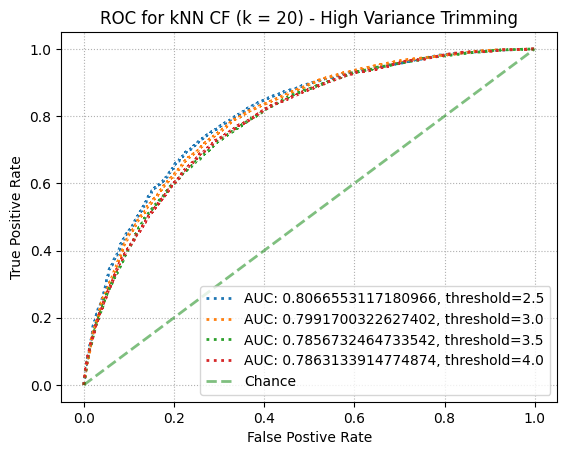

In [ ]:
k = 20
thres = [2.5, 3.0, 3.5, 4.0]

ref = {}
for j in data.raw_ratings:
    if j[1] in ref.keys():
        ref[j[1]].append(j[2])
    else:
        ref[j[1]] = []
        ref[j[1]].append(j[2])

highvar_trim = [j for j in data.raw_ratings if (len(ref[j[1]]) >= 5 and np.var(ref[j[1]]) >= 2)]
df = pd.DataFrame(highvar_trim)
print(df.shape)
df = df.drop(df.columns[3], axis=1)
data_trim = Dataset.load_from_df(df, reader)

trainset, testset = train_test_split(data_trim, test_size=0.1)

pred = KNNWithMeans(k=k,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(testset)

fig, ax = plt.subplots()
for item in thres:
    thresholded_out = []
    for row in res:
        if row.r_ui > item:
            thresholded_out.append(1)
        else:
            thresholded_out.append(0)
    fpr, tpr, thresholds = roc_curve(thresholded_out, [row.est for row in res])
    ax.plot(fpr, tpr,lw=2,linestyle=':',label="AUC: "+str(auc(fpr,tpr))+', threshold='+str(item))
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='g', label='Chance', alpha=.5)
plt.legend(loc='best')
plt.grid(linestyle=':')
plt.title('ROC for kNN CF (k = 20) - High Variance Trimming')
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')
plt.show()

QUESTION 7:

Understanding the NMF cost function: Is the optimization problem given by
equation 5 convex? Consider the optimization problem given by equation 5. For U fixed, formulate it as a least-squares problem

- The optimization problem is not convex in both $U$ and $V$ simultaneuosly, but if either $U$ or $V$ is fixed, the problem becomes convex in the other.

- When $U$ is fixed, the problem can be treated as a least squares problem for optimizing $V$. The goal is to find the matrix V that minimizes the sum of squared differences between the entries of the original matrix $R$ and the corresponding entries of $UV^T$, weighted by the values of $W$.


